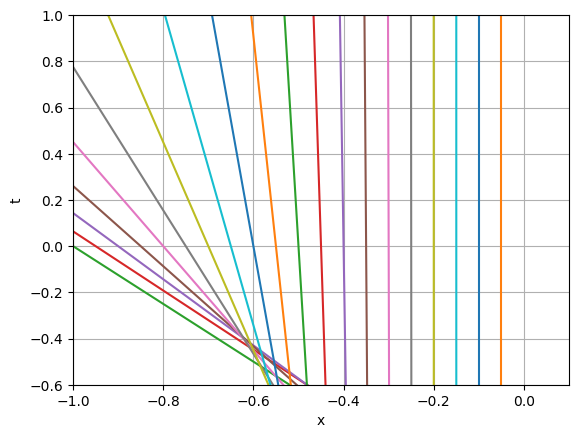

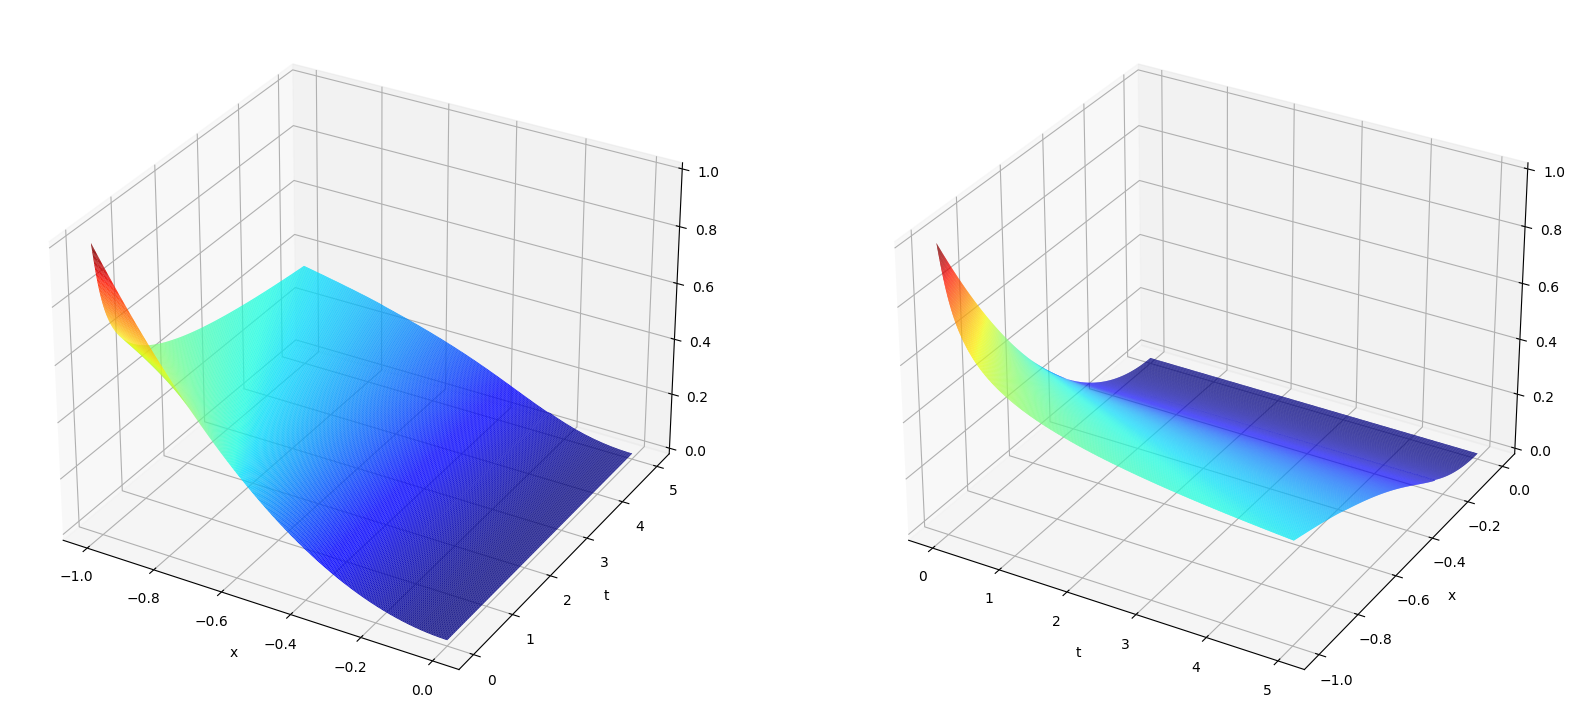

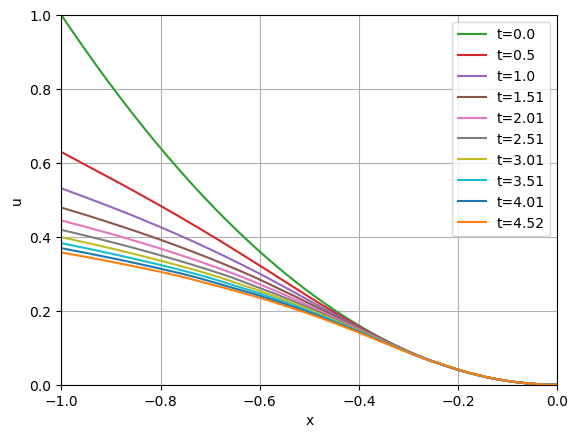

0.7532421455784452


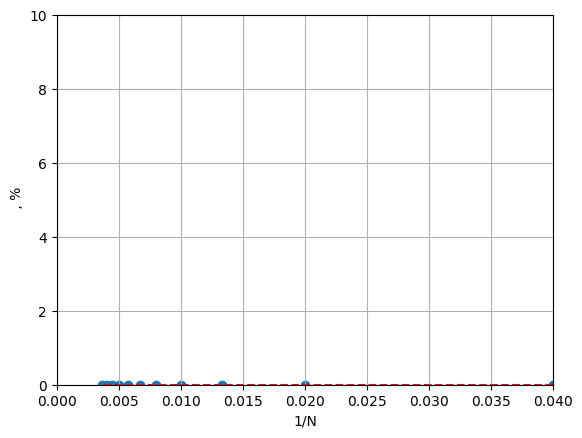

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def ch(t): #charec
    return [(-4*x0**6)/(1+(1+x0**8)**2)*t + x0 for x0 in np.arange(-1, 0, .05)]


t_list = np.arange(-1, 1.1, .1)
ch_list = [ch(t) for t in t_list]
plt.plot(1, 2, 1) #charec graph
plt.ylim(-0.6,1)
plt.xlim(-1,0.1)
plt.plot(ch_list, t_list)
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.show()
k_list = np.arange(25, 300, 25)
ker_list = np.zeros(12, dtype=float)
for k in range(0, 12, 1):
    x_start = -1 #def net
    x_end = 0
    t_start = 0
    t_end = 5
    N = 25+k*25
    J = 25+k*25
    
    tay = (t_end-t_start)/(J-1) # def step
    h = (x_end-x_start)/(N-1)

    t = np.linspace(t_start,t_end,J)
    x = np.linspace(x_start,x_end,N)
    u = np.zeros((N, J), dtype=float)
    
for n in range(0,N):
    u[n][0] = x[n]**2 #in cond
    
def f(n, j): #f(v)
    return ((u[n, j] - u[n, j-1]) / tay - (atan(1 + u[n+1, j] ** 4) -
        atan(1 + u[n, j] ** 4)) / h)
def df(n, j): #f'(v)
    return 1/tay + 4*(u[n, j]**3)/(1+(1+u[n,j]**4)**2)/h
epsilon = 1e-5 #Newton
for n in range(N-2, -1, -1):
    for m in range(1, J):
        u[n, m]=0.5
        eps = 1
        while(eps>epsilon):
            u[n, m] = u[n, m] - float(f(n,m))/float(df(n,m))
            eps = abs(float(f(n,m))/float(df(n,m)))
            
tn = np.linspace(t_start,t_end,J) #3D graph
xm= np.linspace(x_start,x_end,N)
t, x = np.meshgrid(tn, xm)
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
surf=ax.plot_surface(x, t, u, rstride=1, cstride=1, cmap = cm.jet)
plt.ylabel('t')
plt.xlabel('x')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf=ax.plot_surface(t, x, u, rstride=1, cstride=1, cmap = cm.jet)
plt.ylabel('x')
plt.xlabel('t')
plt.show()

x_list = [x_start +j*h for j in range (0, N-1)] #2D graph
plt.plot(1, 2, 1)
plt.ylim(0,1)
plt.xlim(-1,0)
for j in range(0, J-1, 30):
    u_list = [u[n, j] for n in range(0, N-1)]
    plt.plot(x_list, u_list, label="t="+str(round(t_start+j*tay, 2)))
plt.ylabel('u')
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.show()

# error
def F(x0, n, m): # F(v)
    return (-4 * (x0 ** 6)) / (1 + (1 + x0 ** 8) ** 2) * (t_start + tay* m) + x0 - (x_start + n * h)

def dF(x0, m): # F’(v)
    return ((-24 * x0 ** 5) / (1 + (1 + x0 ** 8) ** 2) + ((64 * (x0 ** 13) * (1 + x0 ** 8)) / (1 + (1 + x0 ** 8) ** 2) ** 2)) *(t_start + tay * m) + 1

uch = np.zeros((N, J), dtype=float)
for n in range(0, N):
    uch[n][0] = u[n][0] # in cond
    
epsilon = 1e-5 # Newton error
x0=0.5
for n in range(N - 2, -1, -1):
    for m in range(1, J):
        eps = 1
        while (eps > epsilon):
            x0 = x0 - float(F(x0, n, m)) / float(dF(x0, m))
            eps = abs(float(F(x0, n, m)) / float(dF(x0, m)))
        uch[n,m]=x0**2
maxi=0.
for n in range(0, N):
    for m in range(0, J):
        if abs(u[n,m]-uch[n,m])>maxi:
            maxi = abs((u[n,m]-uch[n,m])/uch[n, m])
ker_list[k]=maxi*100
print(ker_list[k])

args = np.argsort(k_list) #error graph
k_list = 1/k_list[args]
ker_list = ker_list[args]
plt.scatter(k_list, ker_list)
plt.xlabel('1/N')
plt.ylabel(' , %')
plt.ylim(0,10)
plt.xlim(0,0.04)
plt.grid(True)
fit = np.polyfit(k_list, ker_list, deg=1)
p = np.poly1d(fit)
plt.plot(k_list,p(k_list),"r--")
plt.show()